# Life Expectancy vs GDP Data Analysis and Visualisation

## Goal:

Seen in the project below, data on both Gross Domestic Product (GDP) and Life Expectancy at Birth (Years) (LEABY) sourced from the World Health Organisation and the World Bank has been analysed to attempt to identify a relationship between the two variables, in six countries (Chile, China, Germany, Mexico, United States of America and Zimbabwe) over the course of 15 years (2000-2015).




## During the project, I have analysed 7 main objectives:

    -OBJ1: Has life expectancy increased over time in the six nations?
    -OBJ2: Has GDP increased over time in the six nations?
    -OBJ3: What is the average life expectancy in these nations?
    -OBJ4: What is the distribution of life expectancy?
    -OBJ5: What is the average GDP of these nations?
    -OBJ6: What is the distribution of GDP?
    -OBJ7: Is there a correlation between GDP and life expectancy of a country?

### Importing Python Libraries: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading:

In [72]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Altering awkward/messy variable to LEABY instead of Life expectancy at birth(years):

In [8]:
df.columns = ['Country', 'Year', 'LEABY', 'GDP']
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Data Information:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Checking for categorical variable:

In [11]:
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [12]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

Numerical summary of data:

In [16]:
df.describe(include = 'all')

,Country,Year,LEABY,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


Average LEABY and GDP grouped by country:

In [77]:
country_means = df.set_index("Year").groupby("Country").mean()
country_means

,LEABY,GDP
Country,,
Chile,78.94375,1.697888e+11
China,74.26250,4.957714e+12
Germany,79.65625,3.094776e+12
Mexico,75.71875,9.766506e+11
United States of America,78.06250,1.407500e+13
Zimbabwe,50.09375,9.062580e+09


## OBJ1: Has life expectancy increased over time in the six nations?

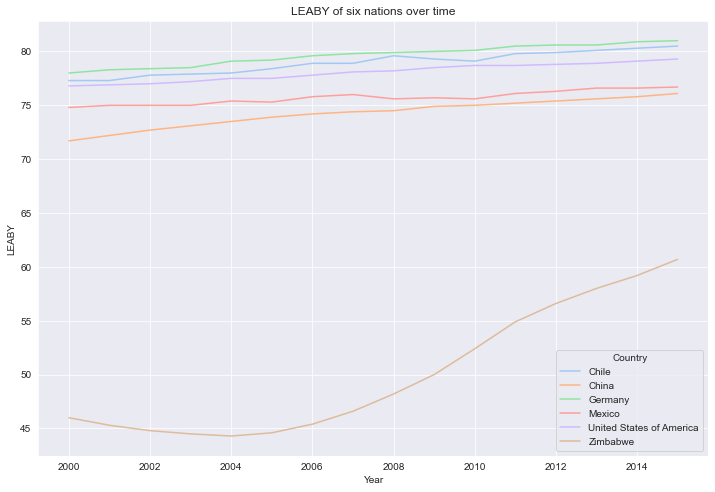

<Figure size 432x288 with 0 Axes>

In [78]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.lineplot(data=df, x='Year', y='LEABY', hue='Country')
plt.title('LEABY of six nations over time')
plt.show()
plt.clf()

## OBJ2: Has GDP increased over time in the six nations?

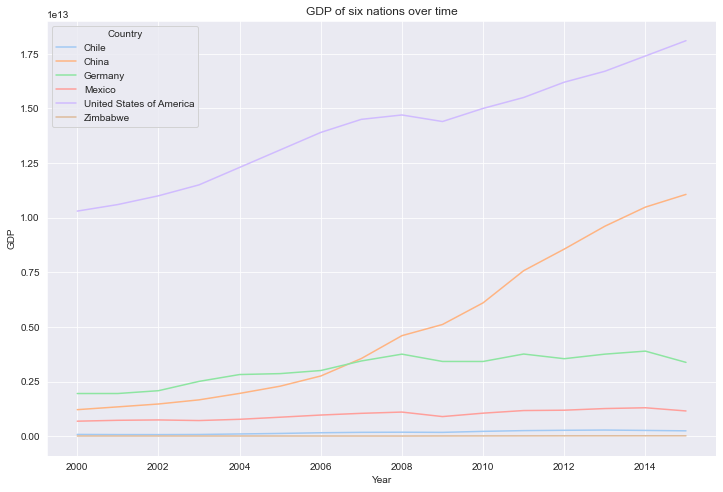

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('GDP of six nations over time')
plt.show()
plt.clf()

## OBJ3: What is the average life expectancy in these nations?

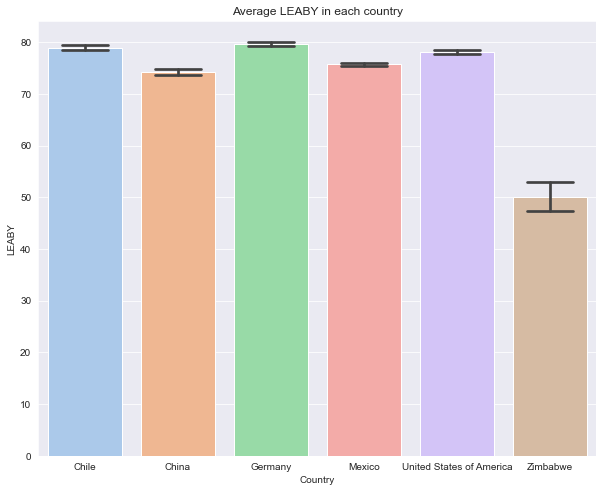

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize = (10,8))
sns.barplot(x='Country', y='LEABY', data=df, capsize = .5)
plt.title('Average LEABY in each country')
plt.show()
plt.clf()


## OBJ4: What is the distribution of that life expectancy?

/Users/saxoncampbell/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


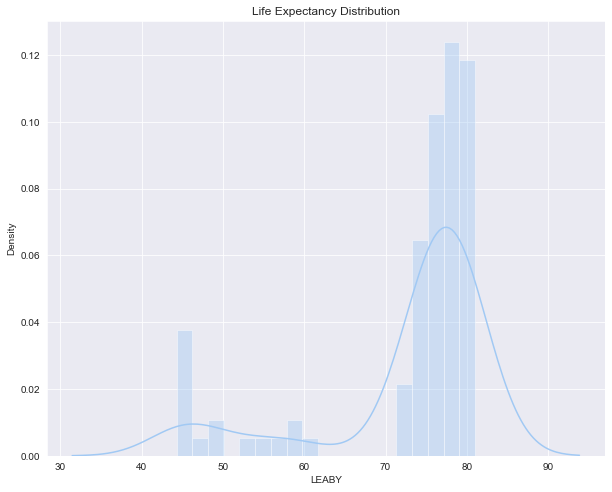

In [101]:
LEABY = df['LEABY']
YEARS = df['Year']

plt.figure(figsize=(10,8))
sns.distplot(LEABY)
plt.title('Life Expectancy Distribution')
plt.show()

In [133]:
LEABY_quartiles = np.quantile(LEABY, [0.25, 0.5, 0.75])
LEABY_quartiles

array([74.475, 76.75 , 78.9  ])

Above shows, that graph of LEABY is left-skewed. Explaining that most of the data is situated between the second quarter 74.46 years and the last quarter 78.9 years.

### Life expectancy distribution for each country:

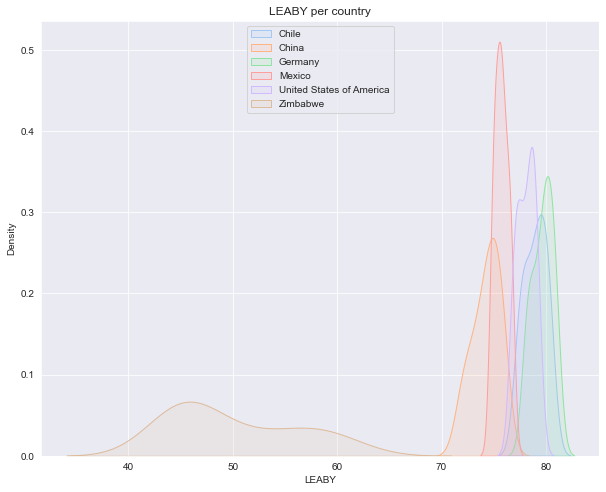

<Figure size 432x288 with 0 Axes>

In [127]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
for country in COUNTRIES:
    sns.kdeplot(df['LEABY'][df.Country == country], shade=True, alpha= 0.15, label=country)
plt.legend(loc= 9)
plt.title('LEABY per country')
plt.show()
plt.clf()

### Splitting the data into low and high GDP groups:

Once the median gdp was found, I split the data into groups above and below this point.

In [137]:
gdp = df['GDP']
median_gdp = np.quantile(gdp, 0.5)
median_gdp

1280220000000.0

In [138]:
low_gdp = df[df['GDP'] <= median_gdp]
low_gdp.head()

,Country,Year,LEABY,GDP,GDP in 100 Billion,GDP in Trillion
0,Chile,2000,77.3,7.786093e+10,0.778609,0.077861
1,Chile,2001,77.3,7.097992e+10,0.709799,0.070980
2,Chile,2002,77.8,6.973681e+10,0.697368,0.069737
3,Chile,2003,77.9,7.564346e+10,0.756435,0.075643
4,Chile,2004,78.0,9.921039e+10,0.992104,0.099210


Can be seen that China only had low GDP in 2000; while Chile, Mexico and Zimbabwe had low GDP over the fifteen years

In [141]:
high_gdp = df[df['GDP'] > median_gdp]
high_gdp.head()

,Country,Year,LEABY,GDP,GDP in 100 Billion,GDP in Trillion
17,China,2001,72.2,1.339400e+12,13.3940,1.33940
18,China,2002,72.7,1.470550e+12,14.7055,1.47055
19,China,2003,73.1,1.660290e+12,16.6029,1.66029
20,China,2004,73.5,1.955350e+12,19.5535,1.95535
21,China,2005,73.9,2.285970e+12,22.8597,2.28597


### LEABY Comparison on both wealth groups (high and low GDP)
Decided to plot a distplot of the two, ignore the red warning below - chose to use this function due to is showing a histogram and trend, but wont be able to use this in future version!


/Users/saxoncampbell/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saxoncampbell/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


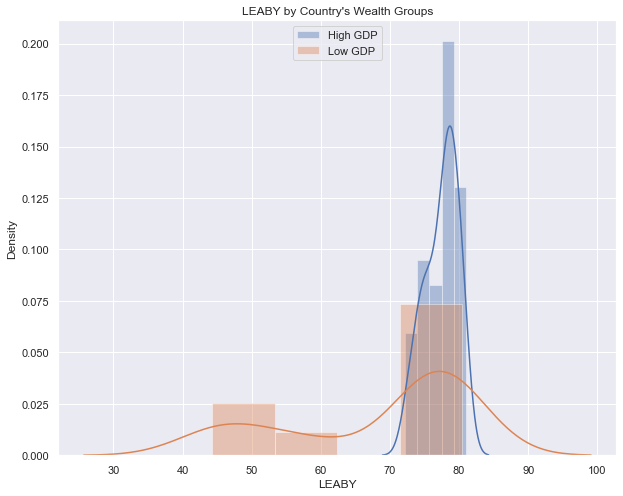

<Figure size 432x288 with 0 Axes>

In [149]:
plt.figure(figsize=(10,8))

sns.distplot(high_gdp['LEABY'], label= 'High GDP')
sns.distplot(low_gdp['LEABY'], label='Low GDP')
plt.title('LEABY by Country\'s Wealth Groups')
plt.legend(loc=9) 
plt.show()
plt.clf()

Upon shallow inspection shows us that all high GDP groups have a high LEABY - a tight spread of around the 70-85 region; whereas the low GDP group, has a much larger spread with some of the data situated around the 45-60 LEABY region, but most of the low GDP LEABY data is also in the same 70-80 region.

## OBJ5: What is the average GDP of these nations?

Below is a bar plot to represent this:

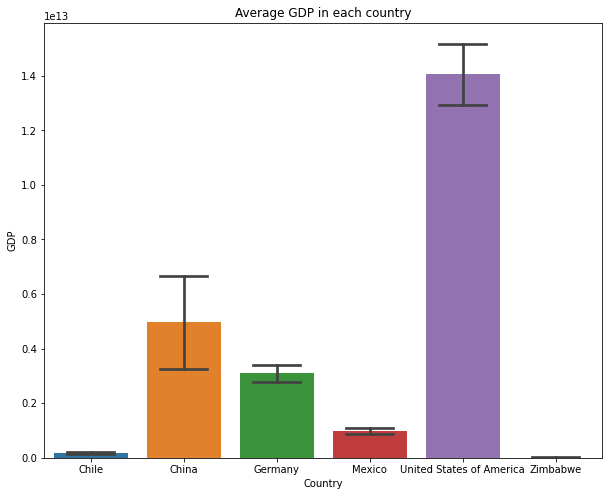

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize = (10,8))
sns.barplot(x='Country', y='GDP', data=df, capsize = .5)
plt.title('Average GDP in each country')
plt.show()
plt.clf()

Above we see the bar charts to represent the average GDP of each of the six countries, however Zimbabwe is out of scope due to being too small (smallest average GDP). This still gives us the order of the countries' average GDP, with USA being the largest by some margin, and then followed by China, Germany, Mexico and Chile.

## OBJ6: What is the distribution of GDP?

Again below I have plotted a unliked distplot function so ignore the warning, won't be able to use this in the future.

/Users/saxoncampbell/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


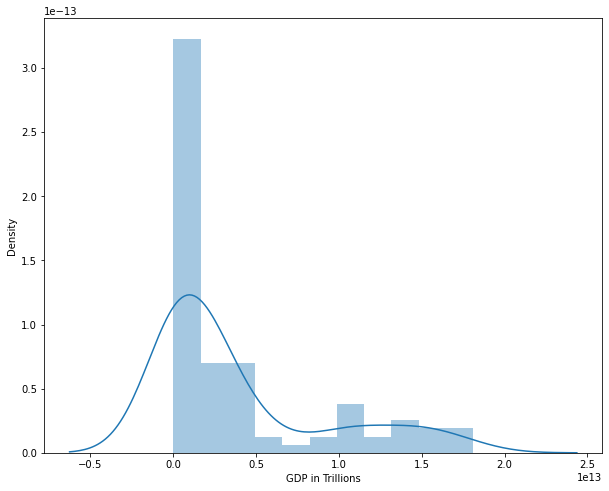

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(df['GDP'])
plt.xlabel('GDP in Trillions')
plt.show()

Apparent Right skew of GDP (opposite to that of LEABY).

### GDP variations of each country over time

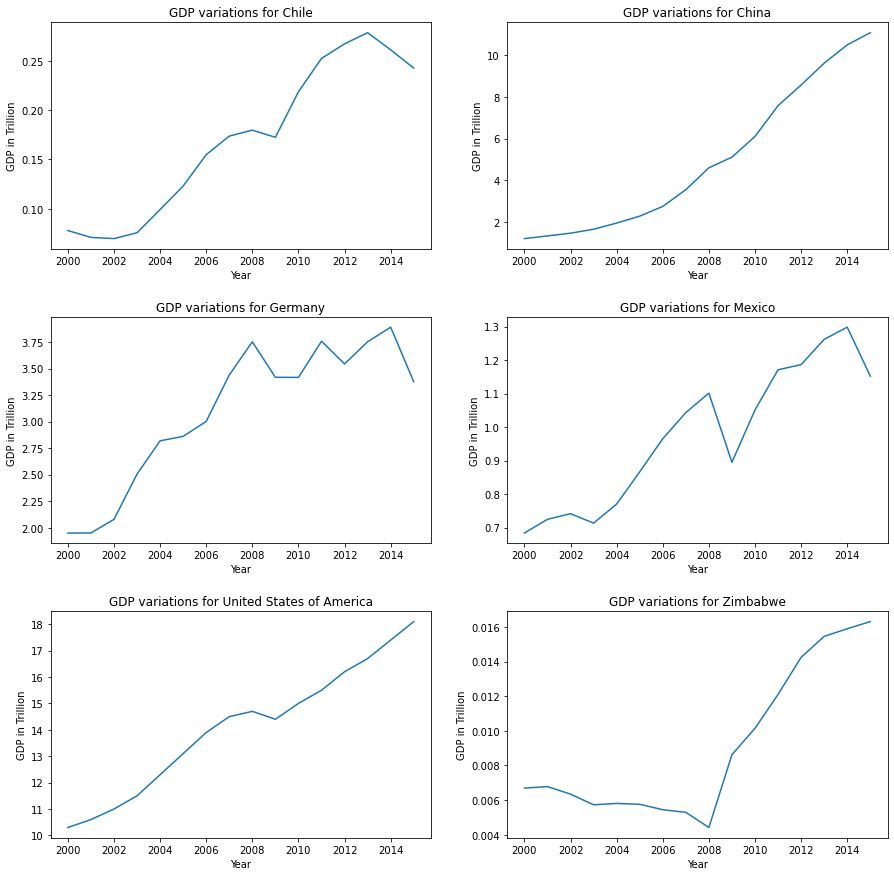

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(15,15))
ax = plt.subplot(3,2,6)

for i, country in zip(range(1,7), COUNTRIES):
    axis = plt.subplot(3,2,i)
    sns.lineplot(data=df[df.Country == country], x='Year', y='GDP in Trillion')
    plt.title('GDP variations for {}'.format(country))

plt.subplots_adjust(hspace=.3)
plt.show()
plt.clf()


The figure above shows that Chile's GDP reached its lowest point between 2000 and 2003. It significantly increased between 2003 and 2007, and over the following 2 years, over 2007-2009 there was a little drop in GDP. Prior to the sharp increase to peak at just shy of 2.7 Trillion USD in 2013, declining afterwards to 2.4 Trillion in 2015.

With its lowest at 0.2 T in 2000, the GDP of China sharply grew at an increasing rate and peaked around 1.2 T in 2015. With the rate of growth slowing in 2011. 

The GDP of Germany increased vastly from 2.0 T in 2000 to around 3.7 in 2008. From that time, it fluctuated before it peaked at 3.9 T in 2014, but it fell steeply to 3.4 in 2015.

Mexico's GDP fluctuated from 0.7 Trillion in 2000 to 0.8 Trillion in 2004. Increasing sharply to reach 1.1 Trillion between 2007-2008, however plunging dramatically to 0.9 Trillion between 2008-2009. Following this, it went up sharply and reached a peak at 1.3 Trillion between 2013 and 2014. Yet similarly to Chile, the GDP fell dramatically below 1.2 Trillion by 2015.

The GDP of the United States of America climbed sharply from 1.0 Trillion in 2000 to around 1.5 Trillion in 2008, but it dropped slightly between 2008 and 2009. Next, it boomed to reach a peak at 1.8 Trillion in 2015.

Zimbabwe's GDP decreased steadily initially, from 0.7 Trillion in 2000 to its lowest 0.4 Trillion in 2008, but it rose sharply and peaked at 1.6 Trillion in 2015.

On a macro scale, there was an overall increase in GDP of all the nations from 2000 to 2015, however Zimbabwe's growth happened only after 2008. 3 of the countries (Mexico, Chile and Germany) all saw rapid declines in GDP after 2013 

## OBJ7: Is there a correlation between GDP and life expectancy of a country?

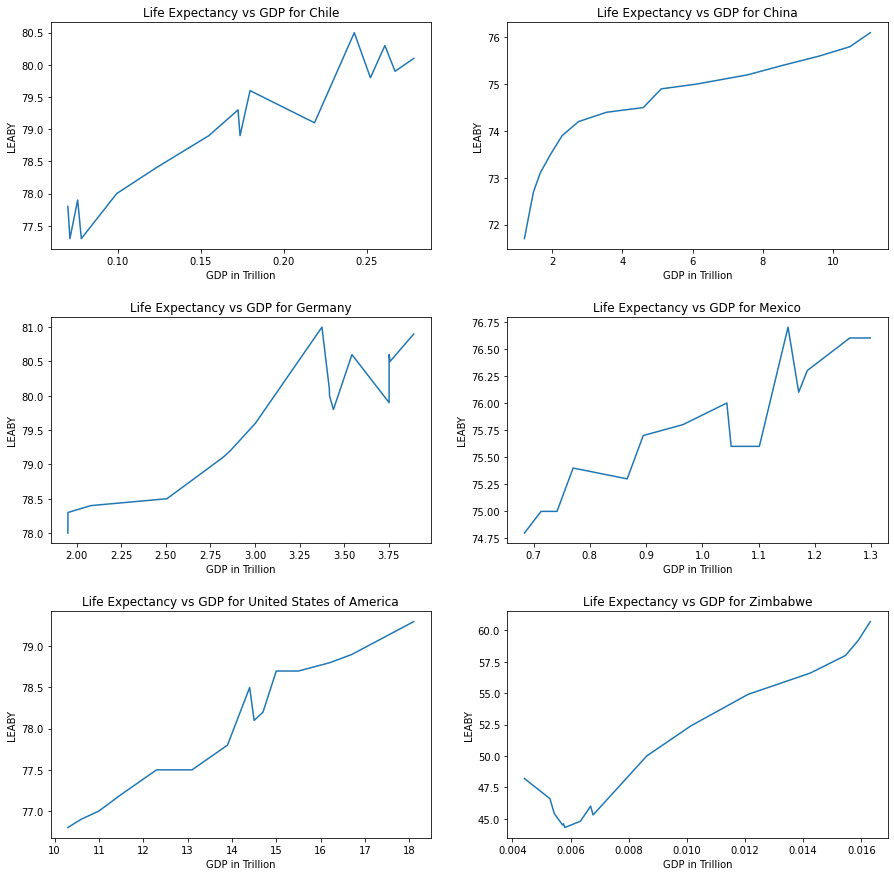

<Figure size 432x288 with 0 Axes>

In [31]:
COUNTRIES = df.Country.unique()
df['GDP in Trillion'] = df.GDP / 1000000000000
plt.figure(figsize=(15,15))
ax = plt.subplot(3,2,6)

for i, country in zip(range(1,7), COUNTRIES):
    axis = plt.subplot(3,2,i)
    sns.lineplot(data=df[df.Country == country], x='GDP in Trillion', y='LEABY')
    plt.title('Life Expectancy vs GDP for {}'.format(country))

plt.subplots_adjust(hspace = .3)
plt.show()
plt.clf()
    
    

### Facet Grid

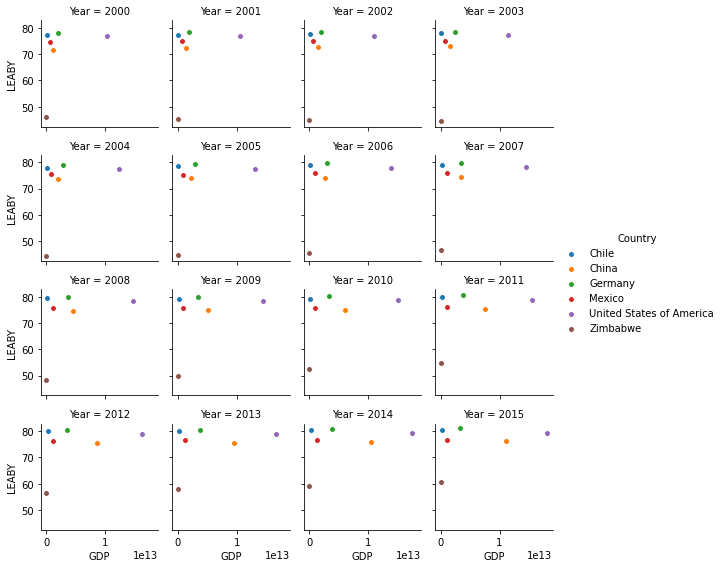

<Figure size 432x288 with 0 Axes>

In [71]:
fg = sns.FacetGrid(data=df, col ='Year',  hue ='Country', col_wrap=4, height=2)
fg =(fg.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend())

plt.show()
plt.clf()
    

From the above figure, there are apparent changes in LEABY vs GDP for some of the countries over the fifteen years. 

There were no large noticeable changes in the correlation of LEABY vs GDP for Chile, Mexico, and Germany throughout the 15 years.
Zimbabwe also had very little change in relative GDP, however moved upwards, increasing LEABY relative to GDP over the examined period.
The GDP of China increased, moving outwards while maintaining a high LEABY. From 2003-2015, China and the United States are the countries with GDP that have had the largest movement along the x-axis, with USA ending up in the upper rihgt quadrant, with both a high GDP and a high LEABY! 
Lastly, for Germany, both GDP and Life expectancy at birth (year) moved very slightly over the fifteen years, maintaining the high LEABY throughout the time observed and GDP expanded marginally.

## Conclusion:


Although many conclusions could be drawn from the data above it will stem back to correlation does not mean causation. However, the above analysis has helped us to gain an insight into the non-obvious relationship between life expectancy at birth and the GDP of six nations from 2000 to 2015.

Many different observations could have been chosen at the beginning of this exploration however the I believe that the 7 chosen allowed a fair investigation to occur.

So, firstly, does higher GDP cause higher LEABY? The short answer to this is no. This is because to cause higher LEABY it has to be the sole reason, and it is understably not that simple. However, we have proven that it is likely a variable in the multivariate equation of Life Expectancy. We saw that all the countries with high GDP have high LEABY; but many countries with high LEABY also had low GDP, so it must not be the sole causer for. Even though their GDP was not increasing at the same rate as USA and China, they still have high LEABY (years).

On a macro scale, how does GDP vary per country over the timescale? Overall, the United States of America had the largest average GDP. Follwed by China, Germany, Mexico, and Chile respectively. Whereas, in terms of growth, China had the largest growth, but all nations saw an apparent rise in GDP.

When looking at LEABY on a macro scale over the 15 years, there was an apparent increase for all nations. Germany had the highest LEABY followed by Chile, USA, Mexico, China, and Zimbabwe in 2015.

To conclude, this project demonstrated that LEABY and GDP were in unison and showed a positive correlation between them for each country in our list from 2000 to 2015. GDP increases as we have seen has varying effects of how large the increase in LEABY must be which can be explained by a multitude of factors. However, LEABY's explanation is a multivate equation, and GDP is only part to play for explaining it.  